<a href="https://colab.research.google.com/github/ibritics/Python_DataAnalytics_Tutorials/blob/main/Lecture06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A/B Testing

## Connecting to the Drive

## Import a data and explore it

In this tutorial, we will simulate an A/B test scenario to analyze the impact of performance bonuses on employee retention within an organization. We want to determine if providing performance bonuses (Plan B) leads to higher employee retention compared to not providing bonuses (Plan A).
https://blog.hubspot.com/marketing/how-to-do-a-b-testing

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Simulate data for Plan A (no bonuses) and Plan B (with bonuses)
plan_a_retention = np.random.uniform(0.7, 0.9, size=1000)
plan_b_retention = np.random.uniform(0.75, 0.95, size=1000)

# Create DataFrames for the two groups
data_a = pd.DataFrame({'Plan': 'A', 'Retention': plan_a_retention})
data_b = pd.DataFrame({'Plan': 'B', 'Retention': plan_b_retention})

# Combine data into one DataFrame
data = pd.concat([data_a, data_b])

# Display the first few rows
print(data.head())

  Plan  Retention
0    A   0.774908
1    A   0.890143
2    A   0.846399
3    A   0.819732
4    A   0.731204


In [2]:
from scipy.stats import ttest_ind

# Separate data into Plan A and Plan B
group_a = data[data['Plan'] == 'A']['Retention']
group_b = data[data['Plan'] == 'B']['Retention']

# Perform a t-test
t_stat, p_value = ttest_ind(group_a, group_b)

# Define significance level
alpha = 0.05

# Check for statistical significance
if p_value < alpha:
    print("Reject the null hypothesis. Plan B has a statistically significant impact on employee retention.")
else:
    print("Fail to reject the null hypothesis. No significant impact on retention.")

Reject the null hypothesis. Plan B has a statistically significant impact on employee retention.


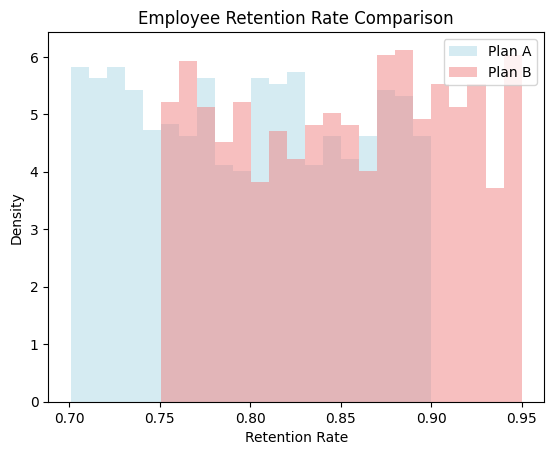

In [4]:
import matplotlib.pyplot as plt

# Create density histograms for Plan A and Plan B
plt.hist(group_a, bins=20, alpha=0.5, label='Plan A', color='lightblue', density=True)
plt.hist(group_b, bins=20, alpha=0.5, label='Plan B', color='lightcoral', density=True)
plt.xlabel('Retention Rate')
plt.ylabel('Density')
plt.title('Employee Retention Rate Comparison')
plt.legend()
plt.show()
